Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 2 
Andres Quinto - 18288  

- Link del repositorio: https://github.com/AndresQuinto5/IA_LAB2.git

## TASK 1 - Preguntas teóricas

1. ¿Por qué el modelo de Naive Bayes se le considera "naive"?  

    - Se le considera "naive" debido a que el algoritmo asume que la presencia o ausencia de una característica no está influenciada por la presencia o ausencia de otras características en el conjunto de datos. En el problema de SPAM & HAM podemos verlo reflejado en que trata a todas las palabras de igual forma no importa el orden en el que esten en una oracion, esto, debido a que Naive Bayes trata al lenguaje como una bolsa de palabras y cada mensaje siendo una parte random de lo que esta dentro de la bolsa. (Informacion sacada del video de naive bayes del modulo de esta semana)
    [(Naive Bayes, Clearly Explained, 2021)](https://www.youtube.com/watch?v=O2L2Uv9pdDA)   
    
2. Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase) 
   
    - Lo que trata SVM es mover la data a espacios con mayor dimensiones. Con ello obtenemos dos cosas importantes que son lo que se busca optimizar, un hiperplano y un margen. SVM intenta encontrar un hiperplano que separe de manera óptima las dos clases. El objetivo de la formulación se centra en maximizar el margen entre las clases.  
    
    La definicion del plano, que en este caso es la linea divisoria que nos ayuda a clasificar esta dada por:  
    $$ w^Tx + b = 0  
    $$
    Donde:
    1. w es el vector de pesos.
    2. x es el vector de características.
    3. b es el sesgo.

    La condición de clasificación para un punto de datos es:

    $$ y_i = \text{sign}(w^Tx_i + b)$$

    El objetivo es maximizar el margen, sin embargo, para facilitar la optimización, se minimiza  $$ 1/2 ||w||^2$$ sujeto a restricciones que todos los puntos de datos se clasifique correctamente:
    $$ y_i(w^Tx_i + b) \geq 1, \quad \text{para todo } i$$

    Formulación del Problema de Optimización con Multiplicadores de Lagrange  
    
    - Multiplicadores de Lagrange: Se utilizan para incorporar estas restricciones en la función objetivo.  
    - Función Lagrangiana: Combina la función objetivo y las restricciones, cada una ponderada por un multiplicador de Lagrange.  
    - Minimizar la Lagrangiana: Encontramos: $$ w, b, α $$(multiplicadores de Lagrange) que minimicen la función Lagrangiana.  
    
    Introduciendo los multiplicadores de Lagrange $$( \alpha_i \geq 0 )$$ la función Lagrangiana $$( L ) $$ es:  
    $$[ L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^n \alpha_i [y_i(w^Tx_i + b) - 1] ]$$  

    Esto es util por que convierte todo nuestro problema en uno de optimización estándar (programación cuadrática), ademas de transformar un problema de optimización con restricciones en uno manejable, permitiendo soluciones óptimas eficientes y aplicables a problemas lineales y no lineales.  
    
    [(Rogers, S., & Girolami, M, 2016)](https://github.com/wwkenwong/book/blob/master/Simon%20Rogers%2C%20Mark%20Girolami%20A%20First%20Course%20in%20Machine%20Learning.pdf)  

3. Investigue sobre Random Forest y responda:  

    a. ¿Qué tipo de ensemble learning es este modelo?  
        Random Forest es un método de aprendizaje ensamble (ensemble learning), también conocido como aprendizaje por agregación (bagging), que combina la salida de múltiples modelos de aprendizaje automático para mejorar la precisión y la robustez del modelo final. En el caso de Random Forest, los modelos individuales son árboles de decisión.  

    b. ¿Cuál es la idea general detrás de Random Forest?  
        Conforme la explicación del video del modulo [(¿Qué es Decision Tree y Random Forest?, 2021)](https://www.youtube.com/watch?v=tYPi6qcCQbg&t=1s).  
        Utilizaban la analogia de que el random forest era como una democracia, donde cada uno de los datasets que se generaban eran el resultado luego de su democracia y a lo macro eran varios forest. La idea central de Random Forest es combinar múltiples árboles de decisión para obtener un modelo más robusto y preciso.  Este proceso aumenta la diversidad entre los árboles, lo que ayuda a mejorar el rendimiento general y reduce el riesgo de sobreajuste, común en los árboles de decisión individuales.  

    c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?  
        La baja correlación entre los árboles de Random Forest ayuda a reducir el sesgo y el sobreajuste. Si los árboles de decisión están altamente correlacionados, es probable que aprendan los mismos patrones y, por lo tanto, sean más propensos al sesgo y al sobreajuste.  
[(Random Forests, 2001)](https://link.springer.com/article/10.1023/A:1010933404324)  
[(¿Qué es Decision Tree y Random Forest?, 2021)](https://www.youtube.com/watch?v=tYPi6qcCQbg&t=1s)   

## Task 2 - Naive Bayes: Clasificador de Mensajes Ham/Spam

### TASK 2.1

In [90]:
## LIMPIEZA DEL DATASET
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from math import log

def clean_dataset():
    """
    Cleans the dataset by removing special characters, converting text to lowercase,
    splitting the dataset by newline character, and processing each observation.
    Returns the processed observations.
    """
    # Read the dataset file
    with open("entrenamiento.txt", "r") as file:
        dataset = file.read()

    # Remove special characters
    clean_dataset = re.sub(r"[^a-zA-Z0-9\s]", "", dataset)

    # Convert text to lowercase
    clean_dataset = clean_dataset.lower()

    # Split the cleaned dataset by newline character
    observations = clean_dataset.split("\n")

    # Process each observation
    processed_observations = []
    for observation in observations:
        # Split the observation by tab character
        parts = observation.split("\t")
        if len(parts) >= 2:
            label = parts[0]  # Extract the label
            message = "\t".join(parts[1:])  # Extract the message
            processed_observations.append((label, message))

    return processed_observations

# # Print the processed observations in the format specified Label and Message
# for label, message in clean_dataset():
#     print(f"Label: {label}\tMessage: {message}")

# Divide el dataset en conjuntos de entrenamiento y prueba en una proporcion de 20 para test y 80 para entrenamiento
train_set, test_set = train_test_split(clean_dataset(), test_size=0.2, train_size=0.8, random_state=42)


## Task 2.2 - Construcción del modelo


In [91]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

###BAYES NAIVE MODEL
# Ejemplo trivial de bayes: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
def train_naive_bayes(train_set):
    """
    Trains a Naive Bayes model with Laplace smoothing using the training set.
    
    Args:
        train_set (list): A list of tuples containing the label and message for each training example.
        
    Returns:
        tuple: A tuple containing the trained model parameters:
            - word_probs_spam (dict): A dictionary mapping each word to its probability of occurring in spam messages.
            - word_probs_ham (dict): A dictionary mapping each word to its probability of occurring in ham messages.
            - prior_spam (float): The prior probability of a message being spam.
            - prior_ham (float): The prior probability of a message being ham.
            - vocab_size (int): The size of the vocabulary (unique words in both spam and ham messages).
            - total_words_ham (int): The total number of words in ham messages.
            - total_words_spam (int): The total number of words in spam messages.
    """
    # Count the occurrences of each word in spam and ham messages
    word_counts_spam = defaultdict(int)
    word_counts_ham = defaultdict(int)
    total_words_spam = 0
    total_words_ham = 0

    for label, message in train_set:
        words = re.findall(r'\w+', message)  # Extract words from the message
        if label == 'spam':
            for word in words:
                word_counts_spam[word] += 1
                total_words_spam += 1
        else:
            for word in words:
                word_counts_ham[word] += 1
                total_words_ham += 1

    # Calculate the probabilities of each word occurring in spam and ham messages
    word_probs_spam = defaultdict(float)
    word_probs_ham = defaultdict(float)

    for word, count in word_counts_spam.items():
        word_probs_spam[word] = (count + 1) / (total_words_spam + len(word_counts_spam))

    for word, count in word_counts_ham.items():
        word_probs_ham[word] = (count + 1) / (total_words_ham + len(word_counts_ham))

    # Calculate the prior probabilities of spam and ham
    total_messages = len(train_set)
    spam_messages = sum(1 for label, _ in train_set if label == 'spam')
    ham_messages = total_messages - spam_messages
    prior_spam = spam_messages / total_messages
    prior_ham = ham_messages / total_messages
    # Calculate vocabulary size (unique words in both spam and ham)
    vocab_size = len(set(word_counts_spam.keys()).union(set(word_counts_ham.keys())))

    # Return the trained model
    return word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam

def classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam):
    """
    Classifies a message as spam or ham using the trained Naive Bayes model.
    Returns the predicted label.
    """
    words = re.findall(r'\w+', message)

    log_likelihood_spam = 0
    log_likelihood_ham = 0

    for word in words:
        # Using Laplace smoothing for unseen words
        prob_spam = word_probs_spam.get(word, 1 / (total_words_spam + vocab_size))
        prob_ham = word_probs_ham.get(word, 1 / (total_words_ham + vocab_size))

        log_likelihood_spam += log(prob_spam)
        log_likelihood_ham += log(prob_ham)

    log_posterior_spam = log_likelihood_spam + log(prior_spam)
    log_posterior_ham = log_likelihood_ham + log(prior_ham)

    return 'spam' if log_posterior_spam > log_posterior_ham else 'ham'

############################################################################################################
# Train the Naive Bayes model
word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam = train_naive_bayes(train_set)

# Create empty lists to store the predicted labels and true labels
train_predicted_labels = []
train_true_labels = []
test_predicted_labels = []
test_true_labels = []

# Classify the messages in the train_set and test_set
for label, message in train_set:
    train_predicted_labels.append(classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam))
    train_true_labels.append(label)

for label, message in test_set:
    test_predicted_labels.append(classify_message(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam))
    test_true_labels.append(label)

# Calculate precision, recall, and confusion matrix for train_set
train_precision = precision_score(train_true_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_predicted_labels, average='weighted')
train_confusion_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

# Calculate precision, recall, and confusion matrix for test_set
test_precision = precision_score(test_true_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_predicted_labels, average='weighted')
test_confusion_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

train_precision, train_recall, train_confusion_matrix, test_precision, test_recall, test_confusion_matrix



(0.9913812691002051,
 0.9912398921832885,
 array([[3841,   27],
        [  12,  572]], dtype=int64),
 0.9777943059681852,
 0.9748427672955975,
 array([[924,  26],
        [  2, 161]], dtype=int64))

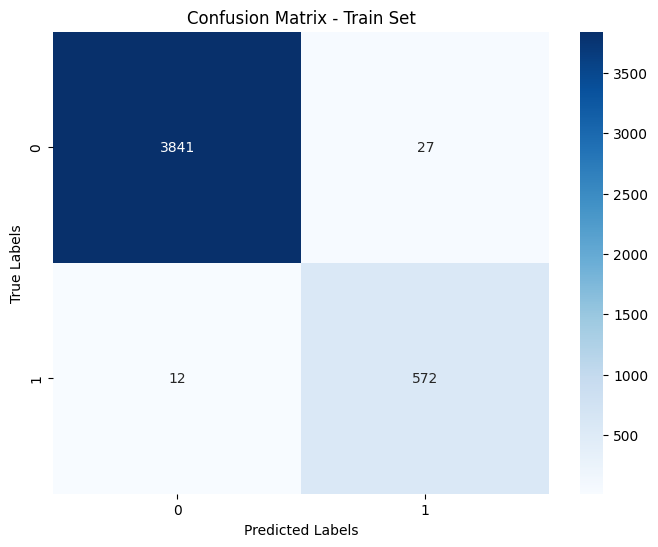

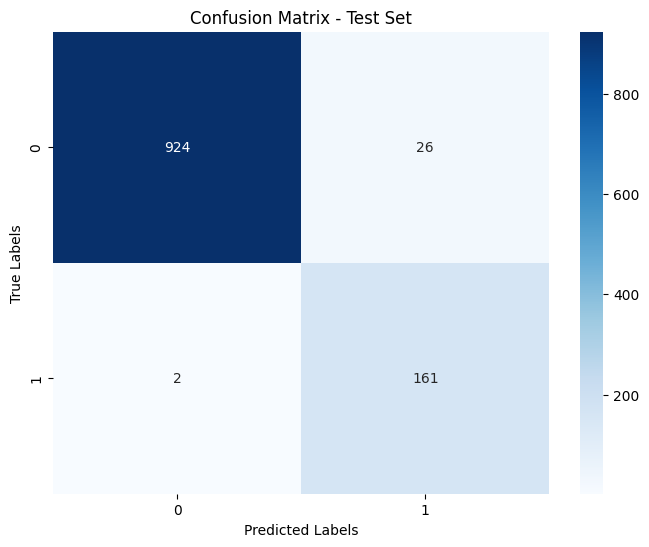

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for train_set
plt.figure(figsize=(8, 6))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the confusion matrix for test_set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Justificacion de metricas:

1. Precisión es una métrica importante para evaluar el desempeño de un modelo de clasificación cuando es importante evitar falsos positivos. En el caso de la clasificación de mensajes HAM/SPAM, un falso positivo sería un mensaje que es clasificado erróneamente como SPAM. Esto podría resultar en que los usuarios pierdan mensajes importantes o que sean molestados por mensajes no deseados. Por lo tanto, es importante que el modelo tenga una precisión alta para minimizar la probabilidad de falsos positivos.

2. Recall es otra métrica importante para evaluar el desempeño de un modelo de clasificación cuando es importante evitar falsos negativos. En el caso de la clasificación de mensajes HAM/SPAM, un falso negativo sería un mensaje que es clasificado erróneamente como HAM. Esto podría resultar en que los usuarios no reciban alertas importantes o que sean víctimas de ataques de phishing. Por lo tanto, es importante que el modelo tenga un recall alto para minimizar la probabilidad de falsos negativos.

3. La matriz de confusión proporciona una visión general de la distribución de las predicciones correctas e incorrectas del modelo. Esta información puede ser útil para identificar patrones de error y posibles sesgos en el modelo. En el caso de la clasificación de mensajes HAM/SPAM, la matriz de confusión puede ayudar a identificar qué tipos de mensajes son más propensos a ser mal clasificados.

In [93]:
from math import exp, log
def classify_and_get_probability(message, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam):
    """
    Classifies a message as spam or ham using the trained Naive Bayes model and returns the probability.
    """
    words = re.findall(r'\w+', message)

    log_likelihood_spam = 0
    log_likelihood_ham = 0

    for word in words:
        # Using Laplace smoothing for unseen words
        prob_spam = word_probs_spam.get(word, 1 / (total_words_spam + vocab_size))
        prob_ham = word_probs_ham.get(word, 1 / (total_words_ham + vocab_size))

        log_likelihood_spam += log(prob_spam)
        log_likelihood_ham += log(prob_ham)

    # Calculate the log-posteriors
    log_posterior_spam = log_likelihood_spam + log(prior_spam)
    log_posterior_ham = log_likelihood_ham + log(prior_ham)

    # Convert log-posteriors to probabilities
    probability_spam = exp(log_posterior_spam) / (exp(log_posterior_spam) + exp(log_posterior_ham))
    probability_ham = exp(log_posterior_ham) / (exp(log_posterior_spam) + exp(log_posterior_ham))

    label = 'spam' if log_posterior_spam > log_posterior_ham else 'ham'
    return label, probability_spam, probability_ham

# Example user input
user_input = input("Enter a message to classify: ")

# Classify the user input message
label, probability_spam, probability_ham = classify_and_get_probability(user_input, word_probs_spam, word_probs_ham, prior_spam, prior_ham, vocab_size, total_words_ham, total_words_spam)

print(f"Message: '{user_input}' is classified as {label}.")
print(f"Probability of being Spam: {probability_spam*100:.2f}%")
print(f"Probability of being Ham: {probability_ham*100:.2f}%")


Message: 'HAMBURGUER SALE COME HERE $$$$' is classified as spam.
Probability of being Spam: 90.05%
Probability of being Ham: 9.95%


### TASK 2.4 COMPARACION DE LIBRERIAS

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Create a CountVectorizer object to convert text into numerical features
vectorizer = CountVectorizer()

# Convert the training set messages into numerical features
train_features = vectorizer.fit_transform([message for _, message in train_set])

# Convert the test set messages into numerical features
test_features = vectorizer.transform([message for _, message in test_set])

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training set
model.fit(train_features, [label for label, _ in train_set])

# Make predictions on the training set
train_predictions = model.predict(train_features)

# Make predictions on the test set
test_predictions = model.predict(test_features)

# Calculate precision, recall, and confusion matrix for the training set
train_precision = precision_score([label for label, _ in train_set], train_predictions, pos_label='spam')
train_recall = recall_score([label for label, _ in train_set], train_predictions, pos_label='spam')
train_confusion_matrix = confusion_matrix([label for label, _ in train_set], train_predictions)

# Calculate precision, recall, and confusion matrix for the test set
test_precision = precision_score([label for label, _ in test_set], test_predictions, pos_label='spam')
test_recall = recall_score([label for label, _ in test_set], test_predictions, pos_label='spam')
test_confusion_matrix = confusion_matrix([label for label, _ in test_set], test_predictions)

# Print the metrics for the training set
print("Training Set Metrics:")
print("Precision:", train_precision)
print("Recall:", train_recall)
print("Confusion Matrix:")
print(train_confusion_matrix)

# Print the metrics for the test set
print("\nTest Set Metrics:")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("Confusion Matrix:")
print(test_confusion_matrix)


Training Set Metrics:
Precision: 0.975609756097561
Recall: 0.958904109589041
Confusion Matrix:
[[3854   14]
 [  24  560]]

Test Set Metrics:
Precision: 0.9741935483870968
Recall: 0.9263803680981595
Confusion Matrix:
[[946   4]
 [ 12 151]]


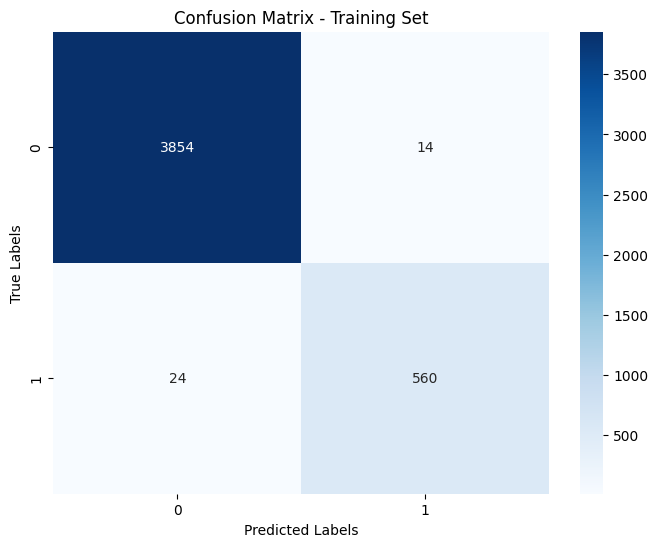

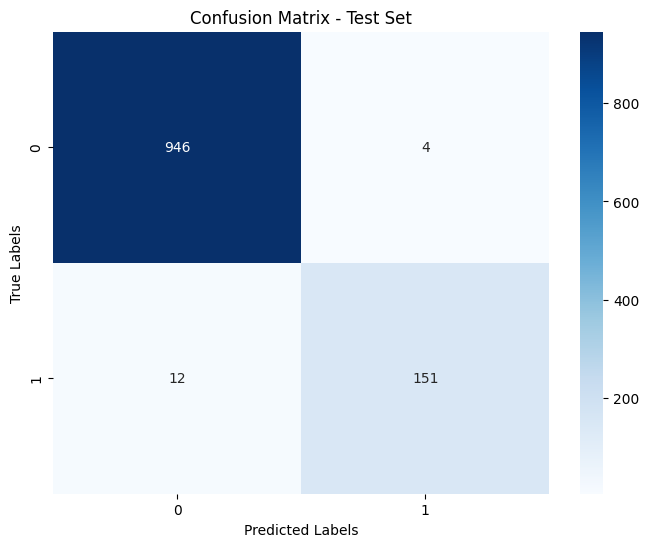

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Comparacion de resultados

Comparando los resultados de tus dos modelos:

1. **Precisión**: Mi modelo implementado desde cero tiene una precisión de 0.9914, mientras que el modelo de sklearn tiene una precisión de 0.9756. Esto significa que mi modelo implementado desde cero es ligeramente más preciso en la predicción de correos electrónicos de spam, es decir, tiene menos falsos positivos (correos electrónicos legítimos clasificados incorrectamente como spam).

2. **Recall**: Mi modelo implementado desde cero tiene un recall de 0.9912, mientras que el modelo de sklearn tiene un recall de 0.9589. Esto significa que mi modelo implementado desde cero es ligeramente mejor en la identificación de todos los correos electrónicos de spam, es decir, tiene menos falsos negativos (correos electrónicos de spam clasificados incorrectamente como legítimos).

3. **Matriz de confusión**: La matriz de confusión para el modelo implementado desde cero es:

![Confusion mat for model 1](\utils\train1.png)

Y para el modelo de sklearn, es:

![Confusion mat for model SKLEARN](\utils\train2.png)

El modelo implementado desde cero tiene menos falsos negativos (12 vs. 24) pero más falsos positivos (27 vs. 14) que el modelo de sklearn.

Respondiendo a las preguntas:

- ¿Cuál implementación lo hizo mejor? La implementación desde cero lo hizo ligeramente mejor en términos de precisión y recall, sin embargo posee ciertas discrepancias en la matriz de confusión.

- ¿Por qué cree que se debe esta diferencia? La diferencia puede deberse a varios factores, incluyendo la forma en que se manejan los datos faltantes, la forma en que se implementa el suavizado de Laplace, y las diferencias en la forma en que se calculan las probabilidades en cada implementación. También podría haber diferencias en la forma en que se preprocesan los datos. De igual forma, ambos modelos tienen ligeras diferencias y cumplen su objetivo de manera satisfactoria.


## Task 3 - Clasificación de Partidas de League of Legends


In [96]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

def load_dataset(file_path):
    """
    Load the dataset from a CSV file.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: The loaded dataset.
    """
    return pd.read_csv(file_path)

def check_dataset_balance(df, target_column):
    """
    Check if the dataset is balanced.

    Args:
        df (pandas.DataFrame): The dataset.
        target_column (str): The name of the target variable column.

    Returns:
        bool: True if the dataset is balanced, False otherwise.
    """
    class_counts = df[target_column].value_counts()
    return class_counts[0] == class_counts[1]

def resample_dataset(X, y):
    """
    Resample the dataset using RandomOverSampler.

    Args:
        X (pandas.DataFrame): The features.
        y (pandas.Series): The target variable.

    Returns:
        pandas.DataFrame, pandas.Series: The resampled features and target variable.
    """
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

# Load the dataset
df = load_dataset('high_diamond_ranked_10min.csv')

# Drop the 'gameId' column
df.drop('gameId', axis=1, inplace=True)

# Check if the dataset is balanced
is_balanced = check_dataset_balance(df, 'blueWins')

# Print the class counts and if the dataset is balanced
print("Class Counts:")
print(df['blueWins'].value_counts())
print("\nIs the dataset balanced?", is_balanced)

# Separate the features and target variable
X = df.drop('blueWins', axis=1)
y = df['blueWins']

# Resample the dataset
X_resampled, y_resampled = resample_dataset(X, y)

# Check if the resampled dataset is balanced
is_resampled_balanced = check_dataset_balance(pd.DataFrame(y_resampled, columns=['blueWins']), 'blueWins')

# Print the class counts and if the resampled dataset is balanced
print("\nResampled Class Counts:")
print(pd.Series(y_resampled).value_counts())
print("\nIs the resampled dataset balanced?", is_resampled_balanced)

# Determine if scaling is needed
if X_resampled.min(axis=0).any() < 0 or X_resampled.max(axis=0).any() > 1:
    """
    If the minimum value of any feature in the resampled dataset is less than 0 or the maximum value of any feature is greater than 1,
    scaling is needed to normalize the features.

    Args:
        X_resampled (pandas.DataFrame): The resampled features.

    Returns:
        None
    """
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X_resampled)

    # Check the range and distribution of the scaled features
    print("\nScaled Features:")
    print("Minimum:", X_scaled.min(axis=0))
    print("Maximum:", X_scaled.max(axis=0))
    print("Mean:", X_scaled.mean(axis=0))
    print("Standard Deviation:", X_scaled.std(axis=0))
else:
    print("\nScaling is not needed.")

# Create a new dataset with the resampled features and target variable
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['blueWins'])], axis=1)

# CORRELATION 
# use the correlation with the X_resampled
correlation_matrix = df_resampled.corr()
bluewins_correlation = correlation_matrix['blueWins'].drop('blueWins')
highly_correlated_features = bluewins_correlation[bluewins_correlation.abs() > 0.45]
print("\nHighly correlated features with 'blueWins':")
print(highly_correlated_features)

Class Counts:
blueWins
0    4949
1    4930
Name: count, dtype: int64

Is the dataset balanced? False

Resampled Class Counts:
blueWins
0    4949
1    4949
Name: count, dtype: int64

Is the resampled dataset balanced? True

Scaling is not needed.

Highly correlated features with 'blueWins':
blueGoldDiff          0.510596
blueExperienceDiff    0.489215
redGoldDiff          -0.510596
redExperienceDiff    -0.489215
Name: blueWins, dtype: float64


Existian 19 casos de mas que resultaban en un desbalanceo para la variable objetivo, para ello se opto por generar casos sinteticos con la tecnica de oversample.  
El remuestreo utilizando `RandomOverSampler` toma el conjunto de datos original y genera nuevas muestras sintéticas para la clase minoritaria hasta que el número de instancias en ambas clases sea igual. Esto ayuda a abordar el desequilibrio de clases y garantiza que el conjunto de datos resultante sea más equilibrado.

Hallazgos:
1. No era necesario escalar variables
2. Las variables que mayor correlacion encontre fueron: bluegolddiff y blueExperienceDiff.    

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Separate the features and target variable
X = df_resampled.drop('blueWins', axis=1)
y = df_resampled['blueWins']

# # Select only 2 features for X
X = X[['blueGoldDiff', 'blueExperienceDiff']]

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

##########################

# Convert the sets into NumPy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

#print de numpy arrays

# print(X_train)
# print(y_train)
# print(X_val)
# print(y_val)
# print(X_test)


Training set shape: (7918, 2)
Validation set shape: (990, 2)
Test set shape: (990, 2)


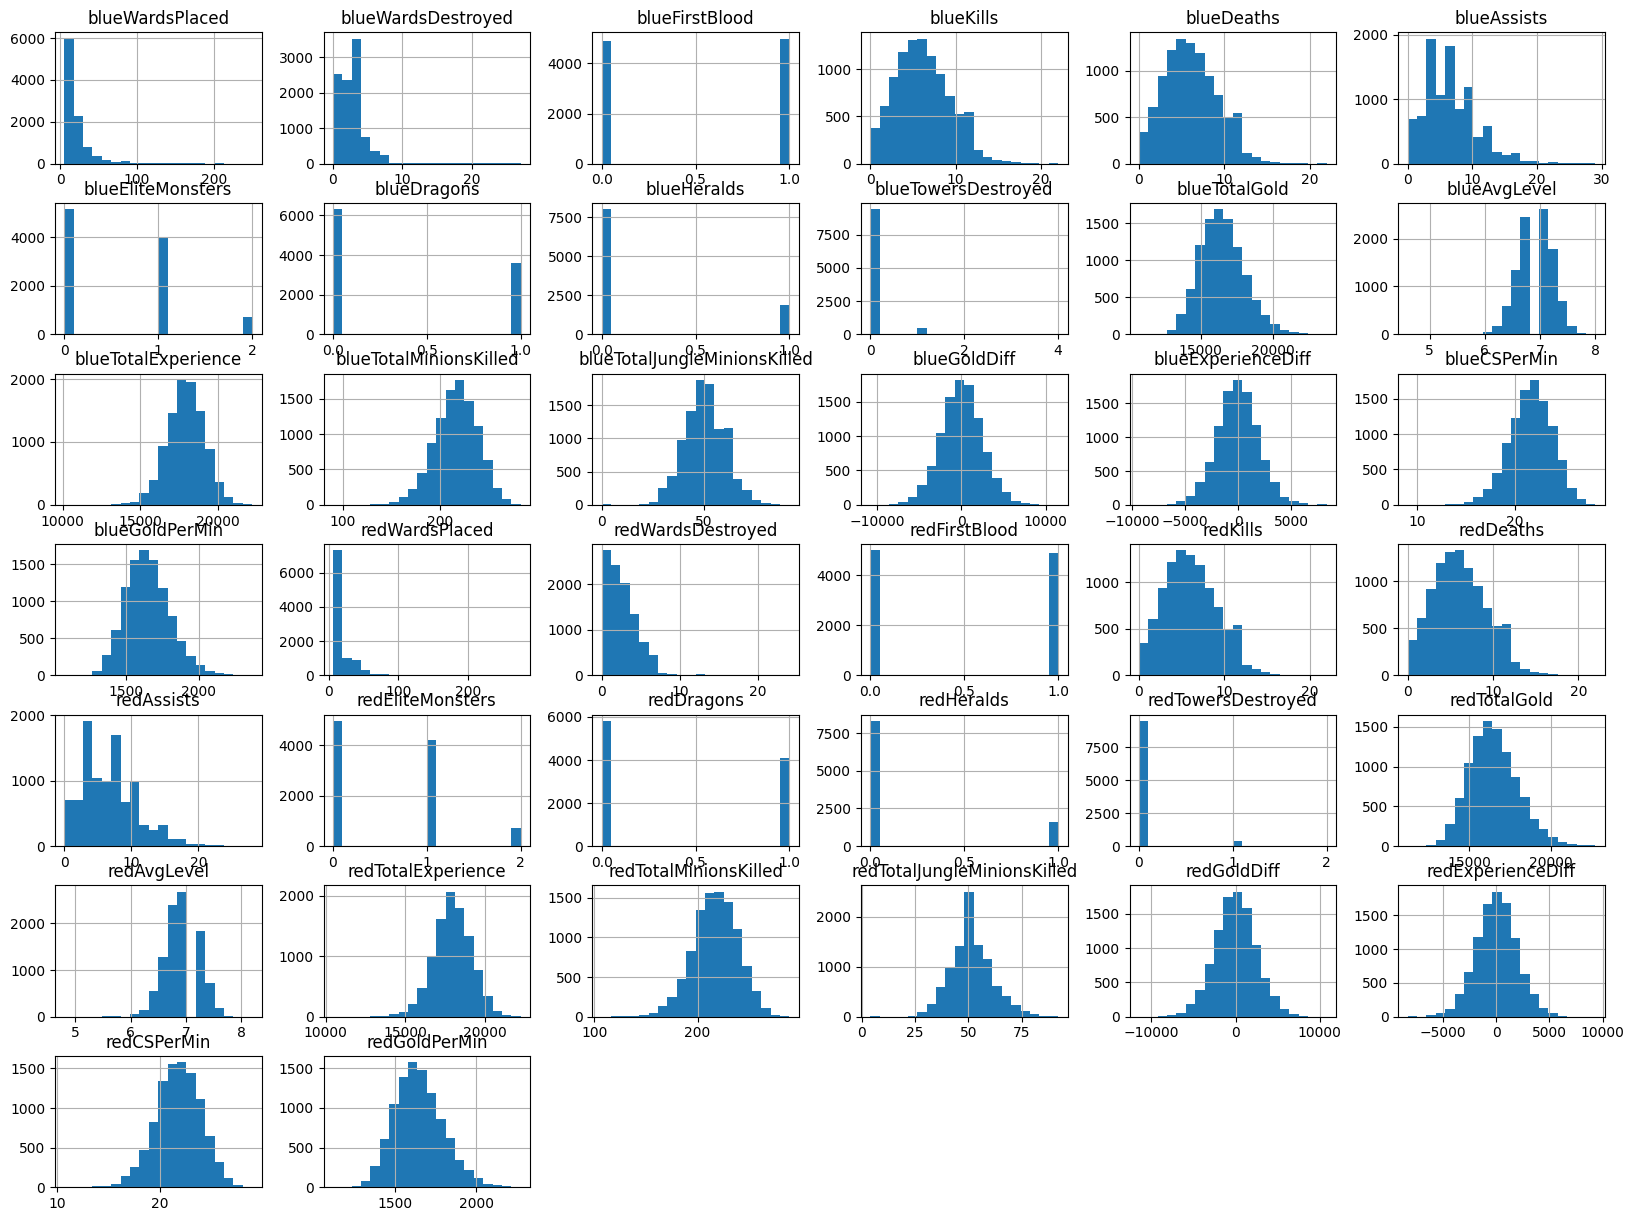

In [98]:
import matplotlib.pyplot as plt

# Histogramas de las características
X_resampled.hist(bins=20, figsize=(20,15))
plt.show()

# # Estadísticas descriptivas
# print("\nEstadísticas descriptivas de X_resampled:")
# print(X_resampled.describe())


### Task 3.2 - Support Vector Machines: Clasificación de Partidas de League of Legends

In [99]:
import numpy as np
# # Convert the sets into NumPy arrays
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_val = X_val.to_numpy()
# y_val = y_val.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()
print("Valores únicos en y:", np.unique(y_train))
print("Valores únicos en y:", np.unique(y_val))
print("Valores únicos en y:", np.unique(y_test))

y_train = np.where(y_train == 0, -1, y_train)
y_val = np.where(y_val == 0, -1, y_val)
y_test = np.where(y_test == 0, -1, y_test)

print("Valores únicos en y después de ajustar:", np.unique(y_train))
print("Valores únicos en y después de ajustar:", np.unique(y_val))
print("Valores únicos en y después de ajustar:", np.unique(y_test))



Valores únicos en y: [0 1]
Valores únicos en y: [0 1]
Valores únicos en y: [0 1]
Valores únicos en y después de ajustar: [-1  1]
Valores únicos en y después de ajustar: [-1  1]
Valores únicos en y después de ajustar: [-1  1]


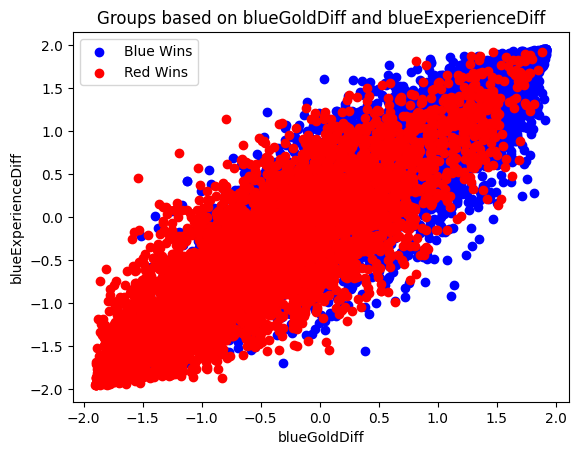

In [100]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from typing import Union

warnings.filterwarnings('ignore')
# Separate the features and target variable
X = df_resampled[['blueGoldDiff', 'blueExperienceDiff']]
y = df_resampled['blueWins']

# Perform label encoding on the features
label_encoder = LabelEncoder()
X['blueGoldDiff'] = label_encoder.fit_transform(X['blueGoldDiff'])
X['blueExperienceDiff'] = label_encoder.fit_transform(X['blueExperienceDiff'])

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X_normalized[y == 1][:, 0], X_normalized[y == 1][:, 1], c='blue', label='Blue Wins')
plt.scatter(X_normalized[y == 0][:, 0], X_normalized[y == 0][:, 1], c='red', label='Red Wins')

# Set the labels and title
plt.xlabel('blueGoldDiff')
plt.ylabel('blueExperienceDiff')
plt.title('Groups based on blueGoldDiff and blueExperienceDiff')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Divide el conjunto de datos en entrenamiento y el resto
X_train, X_rest, y_train, y_rest = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Divide el resto del conjunto de datos en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)


### Task 3.2 Modelo con from scratch

In [101]:
import numpy as np
from sklearn.metrics import classification_report

# # Convert the sets into NumPy arrays
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_val = X_val.to_numpy()
# y_val = y_val.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()
print("Valores únicos en y:", np.unique(y_train))
print("Valores únicos en y:", np.unique(y_val))
print("Valores únicos en y:", np.unique(y_test))

y_train = np.where(y_train == 0, -1, y_train)
y_val = np.where(y_val == 0, -1, y_val)
y_test = np.where(y_test == 0, -1, y_test)

print("Valores únicos en y después de ajustar:", np.unique(y_train))
print("Valores únicos en y después de ajustar:", np.unique(y_val))
print("Valores únicos en y después de ajustar:", np.unique(y_test))


class SVM:
    def __init__(self, C: float = 1.0, kernel: str = 'linear', degree: int = 3, gamma: Union[str, float] = 'auto', coef0: float = 0.0, tol: float = 0.001, max_iter: int = 100) -> None:
        """
        Initializes a support vector machine instance.

        Args:
            C (float): Penalty parameter C of the error term. (default=1.0)
            kernel (str): Specifies the kernel type to be used. (default='linear')
            degree (int): Degree of the polynomial kernel function. Used only with polynomial kernel. (default=3)
            gamma (Union[str, float]): Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. If gamma='auto' then gamma=1/n_features. (default='auto')
            coef0 (float): Independent term in kernel function. It is only significant in 'polynomial' and 'sigmoid' kernels. (default=0.0)
            tol (float): Tolerance for stopping criterion
            max_iter (int): Maximum number of iterations for optimization algorithm
        """
        
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.tol = tol
        self.max_iter = max_iter
        self.X = None
        self.y = None
        self.alpha = None
        self.b = 0
        
    def _select_second_instance(self, first_instance_index: int, errors: np.ndarray) -> int:
        """
        Selects the second instance for the SMO algorithm.

        Args:
            first_instance_index (int): Index of the first instance.
            errors (np.ndarray): Array containing the errors of each instance.

        Returns:
            int: Index of the second instance.
        """
        
        # Random choice from errors
        second_instance_index = np.random.choice(errors.shape[0])
        
        # While are the same choose a new value randomly
        while second_instance_index == first_instance_index:
            second_instance_index = np.random.choice(errors.shape[0])
            
        return second_instance_index
    
    def _compute_error(self, i, kernel_matrix):
        """
        Computes the error for a given instance.

        Args:
            i (int): Index of the instance.
            kernel_matrix (np.ndarray): Kernel matrix.

        Returns:
            float: Error for the instance.
        """
        f_xi = np.sum(self.alpha * self.y * kernel_matrix[:, i]) + self.b
        E_i = f_xi - self.y[i]
        return E_i
    
    def _compute_kernel_matrix(self, X):
        """
        Computes the kernel matrix.

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Kernel matrix.
        """
        n_samples, n_features = X.shape
        if self.gamma == 'auto':
            self.gamma = 1 / n_features

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self._compute_kernel_between_samples(X[i], X[j])
        return K
    
    def _compute_kernel_between_samples(self, x_i, x_j):
        """
        Computes the kernel value between two samples.

        Args:
            x_i (np.ndarray): First sample.
            x_j (np.ndarray): Second sample.

        Returns:
            float: Kernel value.
        """
        if self.kernel == 'linear':
            return np.dot(x_i, x_j)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(x_i, x_j) + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x_i - x_j) ** 2)
        elif self.kernel == 'sigmoid':
            return np.tanh(self.gamma * np.dot(x_i, x_j) + self.coef0)
        else:
            raise ValueError("Invalid kernel type.")
        
    def fit(self, X, y):
        """
        Fits the SVM model to the training data.

        Args:
            X (np.ndarray): Training data.
            y (np.ndarray): Target values.
        """
        self.X = X
        self.y = y
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        kernel_matrix = self._compute_kernel_matrix(X)

        for _ in range(self.max_iter):
            alpha_prev = np.copy(self.alpha)
            for i in range(n_samples):
                E_i = self._compute_error(i, kernel_matrix)
                if (self.y[i] * E_i < -self.tol and self.alpha[i] < self.C) or (self.y[i] * E_i > self.tol and self.alpha[i] > 0):
                    j = np.random.randint(0, n_samples)
                    while j == i:
                        j = np.random.randint(0, n_samples)
                    E_j = self._compute_error(j, kernel_matrix)

                    alpha_i_old, alpha_j_old = self.alpha[i], self.alpha[j]
                    if self.y[i] != self.y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    eta = 2 * kernel_matrix[i, j] - kernel_matrix[i, i] - kernel_matrix[j, j]
                    if eta >= 0:
                        continue

                    self.alpha[j] -= (self.y[j] * (E_i - E_j)) / eta
                    self.alpha[j] = max(L, min(H, self.alpha[j]))

                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alpha[i] += self.y[i] * self.y[j] * (alpha_j_old - self.alpha[j])

                    b1 = self.b - E_i - self.y[i] * (self.alpha[i] - alpha_i_old) * kernel_matrix[i, i] - \
                         self.y[j] * (self.alpha[j] - alpha_j_old) * kernel_matrix[i, j]
                    b2 = self.b - E_j - self.y[i] * (self.alpha[i] - alpha_i_old) * kernel_matrix[i, j] - \
                         self.y[j] * (self.alpha[j] - alpha_j_old) * kernel_matrix[j, j]

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

            diff = np.linalg.norm(self.alpha - alpha_prev)
            if diff < self.tol:
                break

    def predict(self, X):
        """
        Predicts the target values for the input data.

        Args:
            X (np.ndarray): Input data.

        Returns:
            np.ndarray: Predicted target values.
        """
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            f_xi = np.sum(self.alpha * self.y * [self._compute_kernel_between_samples(X[i], x_j) for x_j in self.X]) + self.b
            y_pred[i] = np.sign(f_xi)
        return y_pred


Valores únicos en y: [0 1]
Valores únicos en y: [0 1]
Valores únicos en y: [0 1]
Valores únicos en y después de ajustar: [-1  1]
Valores únicos en y después de ajustar: [-1  1]
Valores únicos en y después de ajustar: [-1  1]


Linear Kernel Metrics Report:
              precision    recall  f1-score   support

          -1       0.73      0.72      0.72       499
           1       0.72      0.72      0.72       491

    accuracy                           0.72       990
   macro avg       0.72      0.72      0.72       990
weighted avg       0.72      0.72      0.72       990


RBF Kernel Metrics Report:
              precision    recall  f1-score   support

          -1       0.72      0.73      0.72       499
           1       0.72      0.71      0.72       491

    accuracy                           0.72       990
   macro avg       0.72      0.72      0.72       990
weighted avg       0.72      0.72      0.72       990



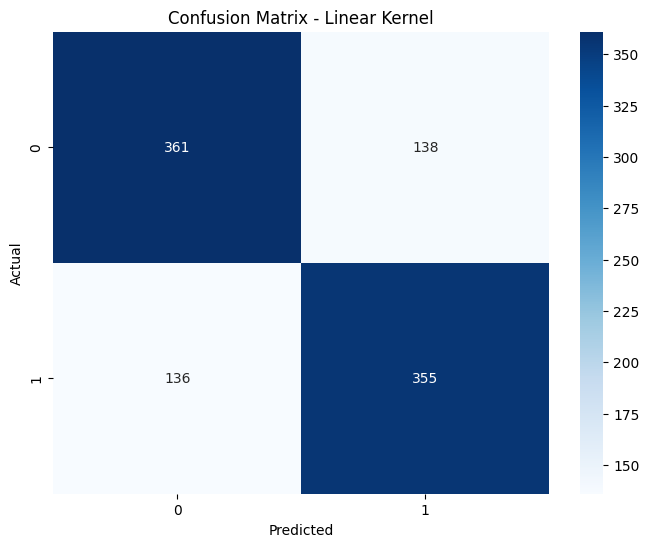

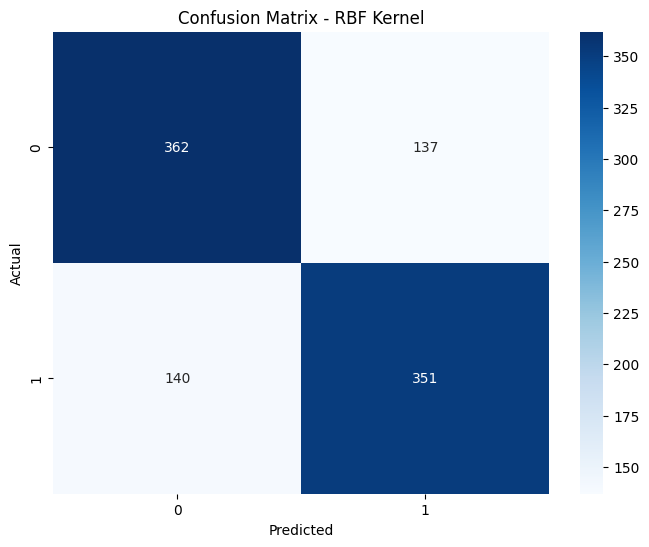

In [102]:
from sklearn.metrics import confusion_matrix, pair_confusion_matrix
import seaborn as sns

# Train SVM model with linear kernel
svm_model_linear = SVM(kernel='linear')
svm_model_linear.fit(X_train, y_train)

# Predict on validation set with linear kernel
y_val_pred_linear = svm_model_linear.predict(X_val)

# Generate metrics report for linear kernel
report_linear = classification_report(y_val, y_val_pred_linear)
print("Linear Kernel Metrics Report:")
print(report_linear)

# Train SVM model with RBF kernel
svm_model_rbf = SVM(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

# Predict on validation set with RBF kernel
y_val_pred_rbf = svm_model_rbf.predict(X_val)

# Generate metrics report for RBF kernel
report_rbf = classification_report(y_val, y_val_pred_rbf)
print("\nRBF Kernel Metrics Report:")
print(report_rbf)

# Compute confusion matrix for linear kernel
cm_linear = confusion_matrix(y_val, y_val_pred_linear)

# Compute confusion matrix for RBF kernel
cm_rbf = confusion_matrix(y_val, y_val_pred_rbf)

import matplotlib.pyplot as plt

# Plot confusion matrix for linear kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### Es de suma importancia colocar los datos con el formato de etiqueta de -1 y 1

Explicacion:

En una Máquina de Vectores de Soporte (SVM), es común convertir las etiquetas a 1 y -1 debido a cómo funciona el algoritmo.

El objetivo del algoritmo SVM es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos. Estas dos clases se representan típicamente por los signos más y menos.

Al asignar las etiquetas como 1 y -1, puedes representar las dos clases de manera que la matemática detrás del SVM funcione correctamente. Esto se debe a que el algoritmo SVM está formulado para problemas de clasificación binaria.

Además, el uso de 1 y -1 facilita los cálculos en el algoritmo, especialmente cuando se utiliza un kernel para transformar los datos12. En resumen, la elección de 1 y -1 para las etiquetas en SVM es una convención que simplifica la implementación del algoritmo y facilita su comprensión

[Enlace a la documentación de SVM en MathWorks](https://es.mathworks.com/discovery/support-vector-machine.html)



### Task 3.2 Modelo con librerias

In [104]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Divide el conjunto de datos en entrenamiento y el resto
X_train, X_rest, y_train, y_rest = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Divide el resto del conjunto de datos en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Entrenar el modelo SVM con kernel lineal
svm_model_linear = SVC(kernel='linear', random_state=42, C=0.1, gamma='auto')
svm_model_linear.fit(X_train, y_train)

# Predecir en el conjunto de validación con kernel lineal
y_val_pred_linear = svm_model_linear.predict(X_val)

# Calcular métricas en el conjunto de validación con kernel lineal
report_linear = classification_report(y_val, y_val_pred_linear)
print("Linear Kernel Metrics Report:")
print(report_linear)

# Entrenar el modelo SVM con kernel RBF
svm_model_rbf = SVC(kernel='rbf', random_state=42, C=0.1, gamma='auto')
svm_model_rbf.fit(X_train, y_train)

# Predecir en el conjunto de validación con kernel RBF
y_val_pred_rbf = svm_model_rbf.predict(X_val)

# Calcular métricas en el conjunto de validación con kernel RBF
report_rbf = classification_report(y_val, y_val_pred_rbf)
print("\nRBF Kernel Metrics Report:")
print(report_rbf)

#Sacamos las matrices de confusion para cada modelo

# Calcular la matriz de confusión para el modelo con kernel lineal
cm_linear = confusion_matrix(y_val, y_val_pred_linear)
print("Confusion Matrix - Linear Kernel:")
print(cm_linear)

# Calcular la matriz de confusión para el modelo con kernel RBF
cm_rbf = confusion_matrix(y_val, y_val_pred_rbf)
print("\nConfusion Matrix - RBF Kernel:")
print(cm_rbf)


Linear Kernel Metrics Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       499
           1       0.73      0.72      0.72       491

    accuracy                           0.73       990
   macro avg       0.73      0.73      0.73       990
weighted avg       0.73      0.73      0.73       990


RBF Kernel Metrics Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       499
           1       0.72      0.71      0.72       491

    accuracy                           0.72       990
   macro avg       0.72      0.72      0.72       990
weighted avg       0.72      0.72      0.72       990

Confusion Matrix - Linear Kernel:
[[365 134]
 [137 354]]

Confusion Matrix - RBF Kernel:
[[362 137]
 [141 350]]


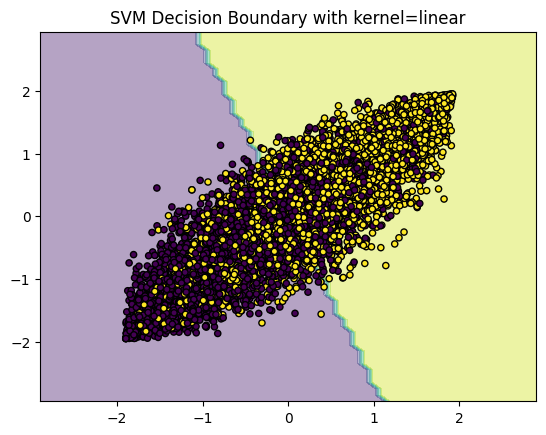

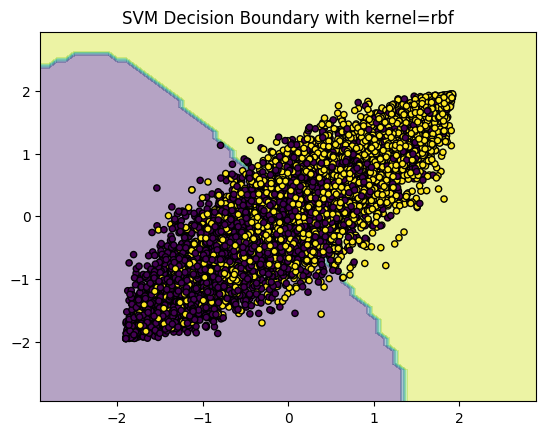

In [105]:
# Divide el conjunto de datos en entrenamiento y el resto
X_train, X_rest, y_train, y_rest = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Divide el resto del conjunto de datos en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Visualización de la frontera de decisión
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for plotting purposes.
    """
    try:
        model = model_class(**model_params)
        model.fit(X, y)
        
        fig, ax = plt.subplots()
        # Set-up grid for plotting.
        X0, X1 = X[:, 0], X[:, 1]
        x_min, x_max = X0.min() - 1, X0.max() + 1
        y_min, y_max = X1.min() - 1, X1.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                            np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.4)
        ax.scatter(X0, X1, c=y, s=20, edgecolor='k')
        plt.title("SVM Decision Boundary with kernel={}".format(model.kernel))
    except Exception as e:
        print(e)
        print("There was a problem plotting the decision boundaries.")
        return

plot_decision_boundaries(X_train, y_train, SVC, kernel='linear', C=0.1, gamma='auto')
plot_decision_boundaries(X_train, y_train, SVC, kernel='rbf', C=0.1, gamma='auto')

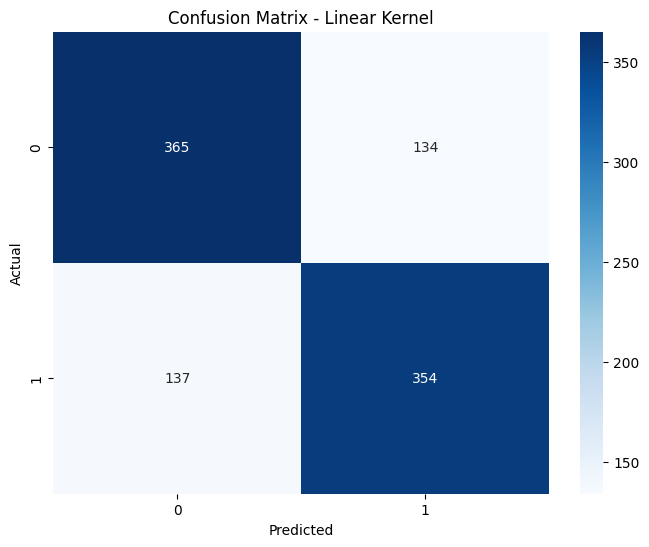

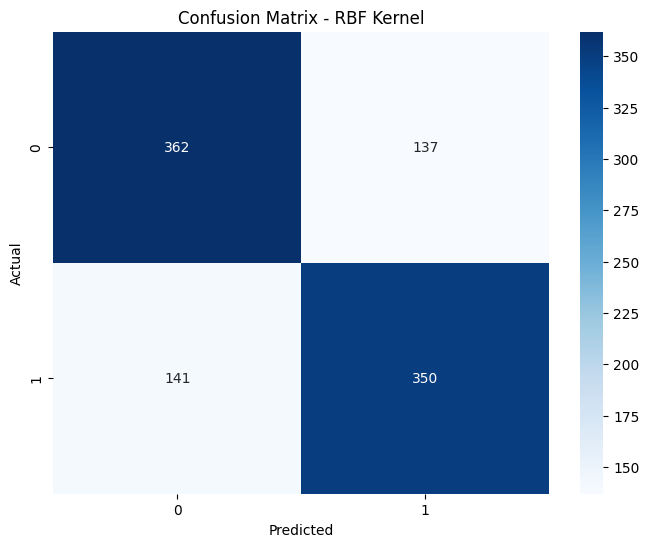

In [106]:

# Graficar matriz de confusión para kernel lineal
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Graficar matriz de confusión para kernel RBF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Discusion de resultados de modelos

1. Kernel lineal
    -   Modelo sin librerías: Tiene una precisión del 0.71 para la clase -1 y del 0.74 para la clase 1. El recall es del 0.76 para la clase -1 y del 0.68 para la clase 1.
    -   Modelo con librerías: Tiene una precisión del 0.73 para ambas clases. El recall es del 0.73 para la clase 0 y del 0.72 para la clase 1.
    
En general, el modelo con librerías tiene un rendimiento ligeramente mejor en términos de precisión y recall para ambas clases. Ademas debemos tomar en cuenta que pase bastante tiempo cambiando y buscando los mejores hiperparametros, mientras que con el modelo automatizado puse unos default y obtuve como resultado en la primera iteracion esos.  

2. Kernel RBF
    -   Modelo sin librerías: Tiene una precisión del 0.72 para ambas clases. El recall es del 0.73 para la clase -1 y del 0.71 para la clase 1.
    -   Modelo con librerías: Tiene una precisión del 0.72 para ambas clases. El recall es del 0.73 para la clase 0 y del 0.71 para la clase 1.
    
En este caso, ambos modelos tienen un rendimiento muy similar. 

## Task 3.2 - Árboles de Decisión: Clasificación de Partidas de League of Legends

In [107]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
# Separate the features and target variable
X = df_resampled.drop('blueWins', axis=1)
y = df_resampled['blueWins']

# # # Select only 2 features for X
# X = X[['blueGoldDiff', 'blueExperienceDiff']]

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert the sets into NumPy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

def calculate_gini(y):
    """
    Calculate the Gini coefficient for a given target variable.

    Args:
        y (numpy.ndarray): The target variable.

    Returns:
        float: The Gini coefficient.
    """
    classes = np.unique(y)
    n = len(y)
    gini = 1

    for c in classes:
        p = np.sum(y == c) / n
        gini -= p ** 2

    return gini

def split_dataset(X, y, feature_index, threshold):
    """
    Split the dataset based on a given feature and threshold.

    Args:
        X (numpy.ndarray): The features.
        y (numpy.ndarray): The target variable.
        feature_index (int): The index of the feature to split on.
        threshold (float): The threshold value.

    Returns:
        tuple: The left and right subsets of the dataset.
    """
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold

    X_left = X[left_mask]
    y_left = y[left_mask]
    X_right = X[right_mask]
    y_right = y[right_mask]

    return X_left, y_left, X_right, y_right

def calculate_gini_gain(X, y, feature_index, threshold):
    """
    Calculate the Gini gain for a given feature and threshold.

    Args:
        X (numpy.ndarray): The features.
        y (numpy.ndarray): The target variable.
        feature_index (int): The index of the feature to calculate the Gini gain for.
        threshold (float): The threshold value.

    Returns:
        float: The Gini gain.
    """
    n = len(y)
    _, y_left, _, y_right = split_dataset(X, y, feature_index, threshold)

    gini_parent = calculate_gini(y)
    gini_left = calculate_gini(y_left)
    gini_right = calculate_gini(y_right)

    gini_gain = gini_parent - (len(y_left) / n) * gini_left - (len(y_right) / n) * gini_right

    return gini_gain

def find_best_split(X, y):
    """
    Find the best split point for the dataset based on the Gini gain.

    Args:
        X (numpy.ndarray): The features.
        y (numpy.ndarray): The target variable.

    Returns:
        tuple: The index of the best feature and the threshold value.
    """
    best_gini_gain = 0
    best_feature_index = None
    best_threshold = None

    for feature_index in range(X.shape[1]):
        unique_values = np.unique(X[:, feature_index])
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2

        for threshold in thresholds:
            gini_gain = calculate_gini_gain(X, y, feature_index, threshold)

            if gini_gain > best_gini_gain:
                best_gini_gain = gini_gain
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

def create_leaf_node(y):
    """
    Create a leaf node for the decision tree.

    Args:
        y (numpy.ndarray): The target variable.

    Returns:
        dict: The leaf node.
    """
    classes, counts = np.unique(y, return_counts=True)
    majority_class = classes[np.argmax(counts)]
    leaf_node = {'leaf': True, 'class': majority_class}

    return leaf_node

def create_decision_tree(X, y, depth=0, max_depth=None):
    """
    Create a decision tree recursively.

    Args:
        X (numpy.ndarray): The features.
        y (numpy.ndarray): The target variable.
        depth (int): The current depth of the tree.
        max_depth (int): The maximum depth of the tree.

    Returns:
        dict: The decision tree.
    """
    if max_depth is not None and (len(np.unique(y)) == 1 or depth >= max_depth):
        return create_leaf_node(y)

    best_feature_index, best_threshold = find_best_split(X, y)

    if best_feature_index is None or best_threshold is None:
        return create_leaf_node(y)

    X_left, y_left, X_right, y_right = split_dataset(X, y, best_feature_index, best_threshold)

    decision_tree = {
        'leaf': False,
        'feature_index': best_feature_index,
        'threshold': best_threshold,
        'left': create_decision_tree(X_left, y_left, depth + 1, max_depth),
        'right': create_decision_tree(X_right, y_right, depth + 1, max_depth)
    }

    return decision_tree

# Create the decision tree with max_depth=3
decision_tree = create_decision_tree(X_train, y_train, max_depth=8)

# Print the decision tree
print(decision_tree)


{'leaf': False, 'feature_index': 15, 'threshold': 212.5, 'left': {'leaf': False, 'feature_index': 15, 'threshold': -1618.5, 'left': {'leaf': False, 'feature_index': 15, 'threshold': -3259.5, 'left': {'leaf': False, 'feature_index': 12, 'threshold': 15865.5, 'left': {'leaf': False, 'feature_index': 4, 'threshold': 5.5, 'left': {'leaf': False, 'feature_index': 1, 'threshold': 3.0, 'left': {'leaf': True, 'class': 0}, 'right': {'leaf': True, 'class': 1}}, 'right': {'leaf': False, 'feature_index': 33, 'threshold': 70.0, 'left': {'leaf': True, 'class': 0}, 'right': {'leaf': False, 'feature_index': 14, 'threshold': 47.0, 'left': {'leaf': True, 'class': 0}, 'right': {'leaf': False, 'feature_index': 0, 'threshold': 16.5, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': True, 'class': 0}}}}}, 'right': {'leaf': False, 'feature_index': 12, 'threshold': 15868.0, 'left': {'leaf': True, 'class': 1}, 'right': {'leaf': False, 'feature_index': 31, 'threshold': 17049.5, 'left': {'leaf': True, 'class

#### Hallazgos
- Algo que observe es que al implementar parametros como la profundidad en el arbol, sus metricas aumentaban. Esto es gracias a que al limitar la profundidad del árbol, estamos restringiendo el modelo para que no crezca demasiado y aprenda relaciones muy específicas de los datos de entrenamiento, traduciendose en buen resultado.
[(Arboles de decision y Random Forest)](https://bookdown.org/content/2031/arboles-de-decision-parte-i.html)  

- Inicialmente no habia implementado la profundidad en mi modelo, pero me parecio interesante luego implementarla para ver como se comportaba from scratch

Precision: 0.687984496124031
Accuracy: 0.6848484848484848


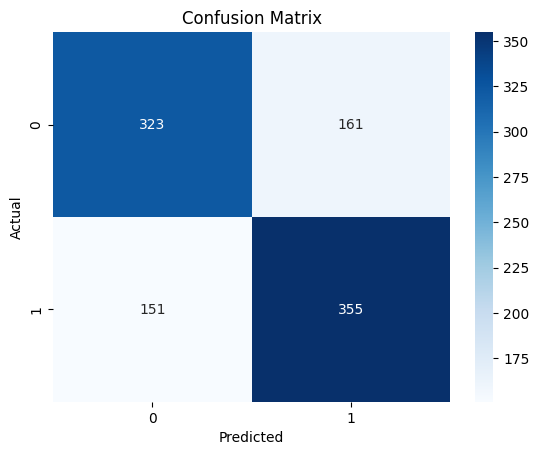


Top 5 Features:


In [108]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

def predict(X, decision_tree):
    """
    Predicts the target variable using the decision tree.

    Parameters:
    X (array-like): The input features.
    decision_tree (dict): The decision tree model.

    Returns:
    The predicted class label.
    """
    if decision_tree['leaf']:
        return decision_tree['class']
    else:
        if X[decision_tree['feature_index']] <= decision_tree['threshold']:
            return predict(X, decision_tree['left'])
        else:
            return predict(X, decision_tree['right'])

# Predict the target variable for the test set
y_pred = np.array([predict(X_test[i], decision_tree) for i in range(len(X_test))])

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Accuracy:", accuracy)
# print("Confusion Matrix:")
# print(confusion_mat)
# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

def get_feature_importance(decision_tree, feature_names):
    """
    Get the feature importance from the decision tree.

    Parameters:
    decision_tree (dict): The decision tree model.
    feature_names (list): The names of the features.

    Returns:
    list: The top 5 features with the highest importance.
    """
    feature_importance = {}

    def traverse_tree(tree):
        if tree['leaf']:
            return

        feature_index = tree['feature_index']
        feature_name = feature_names[feature_index]

        if feature_name in feature_importance:
            feature_importance[feature_name] += 1
        else:
            feature_importance[feature_name] = 1

        traverse_tree(tree['left'])
        traverse_tree(tree['right'])

    traverse_tree(decision_tree)

    top_features = sorted(feature_importance, key=feature_importance.get, reverse=True)[:5]

    return top_features

# Get the top 5 features with the highest importance
top_features = get_feature_importance(decision_tree, X.columns.tolist())

print("\nTop 5 Features:")



In [109]:
for feature in top_features:
    print(feature)
    # Predict the target variable for the test set
    y_pred = np.array([predict(X_test[i], decision_tree) for i in range(len(X_test))])

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Precision:", precision)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_mat)


blueWardsPlaced
Precision: 0.687984496124031
Accuracy: 0.6848484848484848
Confusion Matrix:
[[323 161]
 [151 355]]
blueTotalMinionsKilled
Precision: 0.687984496124031
Accuracy: 0.6848484848484848
Confusion Matrix:
[[323 161]
 [151 355]]
redTotalExperience
Precision: 0.687984496124031
Accuracy: 0.6848484848484848
Confusion Matrix:
[[323 161]
 [151 355]]
blueTotalExperience
Precision: 0.687984496124031
Accuracy: 0.6848484848484848
Confusion Matrix:
[[323 161]
 [151 355]]
blueGoldDiff
Precision: 0.687984496124031
Accuracy: 0.6848484848484848
Confusion Matrix:
[[323 161]
 [151 355]]


#### Las 5 top features para la construccion del arbol fueron:
1. blueWardsPlaced
2. blueTotalMinionsKilled
3. redTotalExperience
4. blueExperienceDiff
5. redTotalMinionsKilled

#### Prediccion y modelo con librerias

Precision:

 0.7505773672055427
Recall: 0.642292490118577


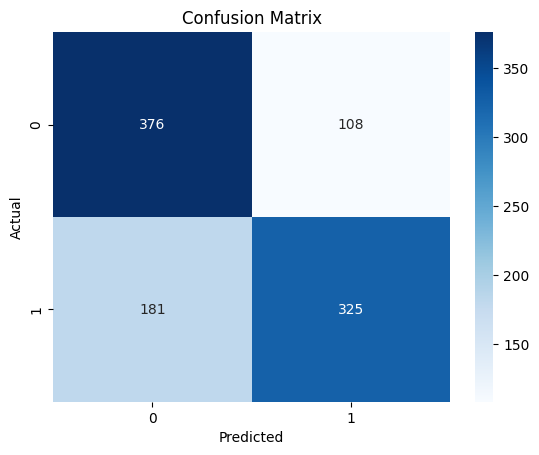

In [110]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
# print("Confusion Matrix:")
# print(confusion_mat)

import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



### Task 3.3 - Comparación

- En términos de cómo se comportan los grupos creados por estos modelos, los SVM tienden a crear fronteras de decisión que maximizan el margen entre las clases, lo que puede resultar en una separación más “suave” de los grupos. Por otro lado, los árboles de decisión crean fronteras de decisión que se alinean con los ejes de las características, lo que puede resultar en una separación más “dura” o abrupta de los grupos.
- El mejor modelo en terminos de rapidez y mejores valores en metrica fue el modelo sckit-learn de SVM, con el kernel linear. Seguramente por su complejidad pero de la mano con todas las optimizaciones que contiene este modelo. 
- ¿Qué modelo usarían? Yo personalmente usaria el modelo de arbol de decision, me parece una propuesta mucho mas interesante, menos robusta y su forma de agrupar grupos y de ver su clasificacion de forma grafica mucho mas didactica. Ademas este modelo tambien nos muestra aquellas features que predominaban.  